In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
import os

In [175]:
os.getcwd()

'C:\\Users\\pawan\\Downloads\\Python\\linear regression exam'

In [176]:
df = pd.read_csv("Fish_dataset.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [177]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [179]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [180]:
df.isnull().values.any()

False

In [181]:
 df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### Q.1 Plot a bar chart showing count of individual species? 

In [182]:
A =  df['Species'].value_counts()
A = pd.DataFrame(A)
A

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


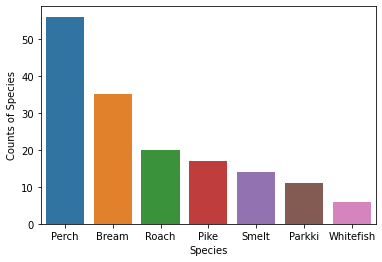

In [183]:
import seaborn as sns
sns.barplot(x=A.index, y=A['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

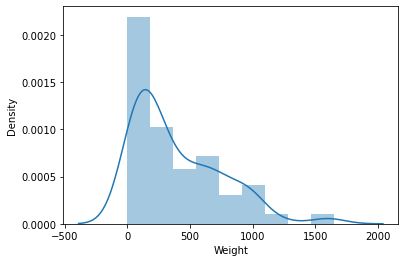

In [184]:
sns.distplot(df['Weight'])

### Correlation

In [185]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

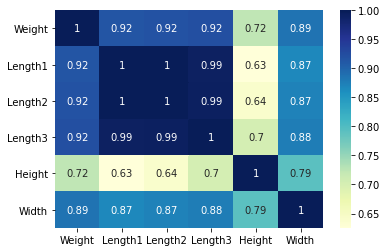

In [186]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

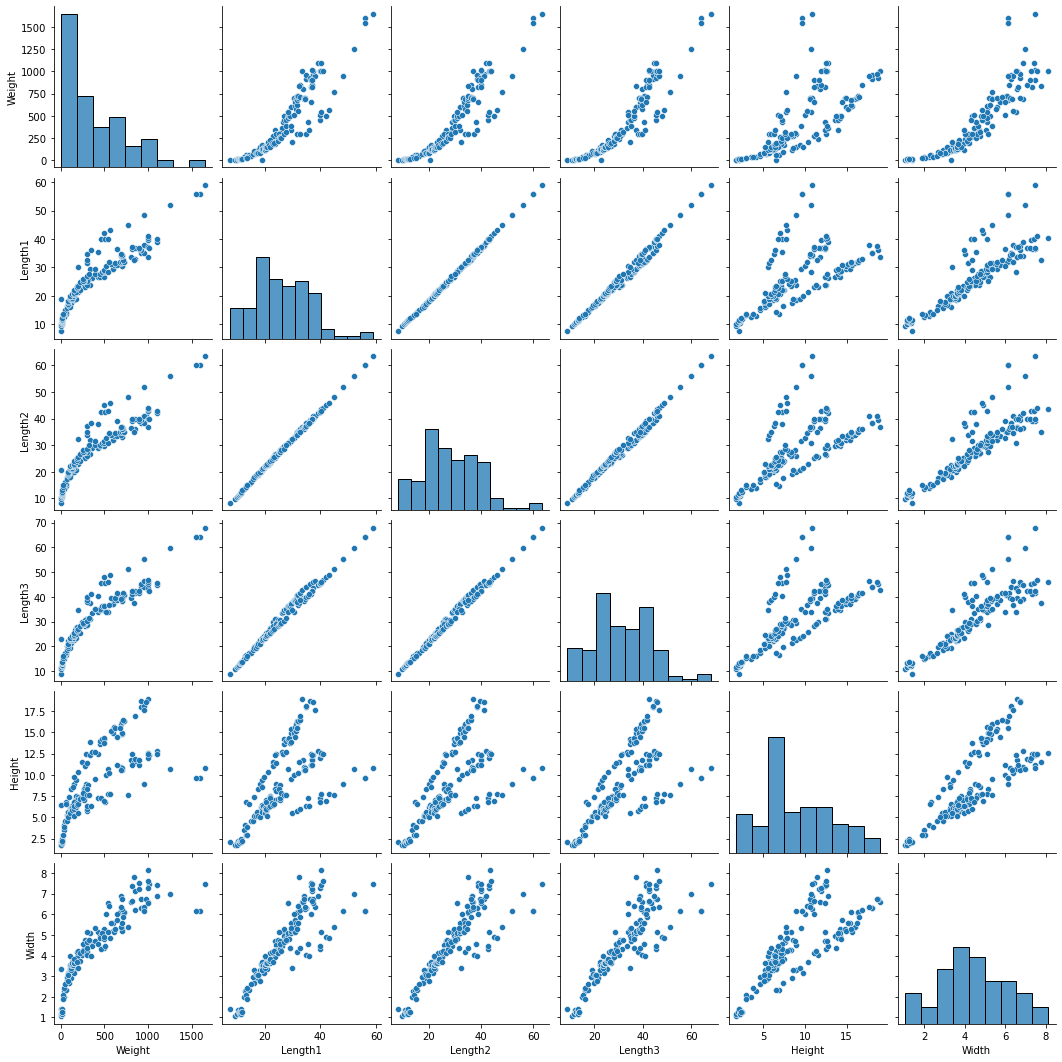

In [187]:
sns.pairplot(df)

### Analysing and Dealing with Outliers
#### Q.2 Identify outliers and remove if any?

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

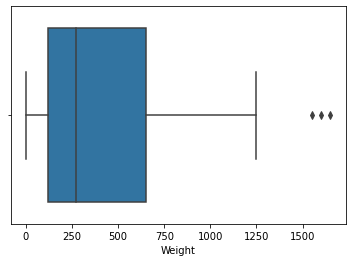

In [188]:
sns.boxplot(df['Weight'])

#### Using IQR Score
1.Sort the dataset in increasing order.

2.Calculate the first quartile(q1) and third quartile (q3)

3.Find Interquartile range (q3-q1)

4.Find the lower bound - lower_bound = (q1 -1.5 * iqr)

5.Find the upper bound - upper_bound = (q3 +1.5 * iqr)

6.Anything that lies above or below the iqr is an outlier.

In [189]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [190]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

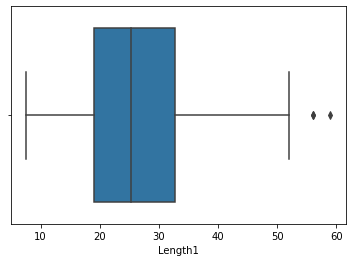

In [191]:
sns.boxplot(df['Length1'])

In [192]:
df1 = df['Length1']
df1_Q1 = df1.quantile(0.25)
df1_Q3 = df1.quantile(0.75)
df1_IQR = df1_Q3 - df1_Q1
df1_lowerend = df1_Q1 - (1.5 * df1_IQR)
df1_upperend = df1_Q3 + (1.5 * df1_IQR)

In [193]:
df1_outliers = df1[(df1 < df1_lowerend) | (df1 > df1_upperend)]
df1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

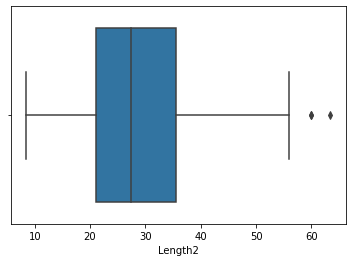

In [194]:
sns.boxplot(df['Length2'])

In [195]:
df2 = df['Length2']
df2_Q1 = df2.quantile(0.25)
df2_Q3 = df2.quantile(0.75)
df2_IQR = df2_Q3 - df2_Q1
df2_lowerend = df2_Q1 - (1.5 * df2_IQR)
df2_upperend = df2_Q3 + (1.5 * df2_IQR)

df2_outliers = df2[(df2 < df2_lowerend) | (df2 > df2_upperend)]
df2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

<AxesSubplot:xlabel='Length3'>

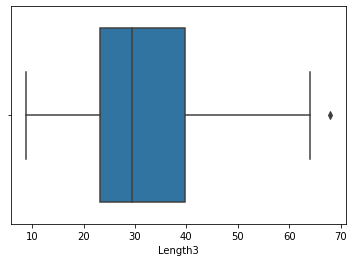

In [196]:
sns.boxplot(x=df['Length3'])

In [197]:
df3 = df['Length3']
df3_Q1 = df3.quantile(0.25)
df3_Q3 = df3.quantile(0.75)
df3_IQR = df3_Q3 - df3_Q1
df3_lowerend = df3_Q1 - (1.5 * df3_IQR)
df3_upperend = df3_Q3 + (1.5 * df3_IQR)

df3_outliers = df3[(df3 < df3_lowerend) | (df3 > df3_upperend)]
df3_outliers

144    68.0
Name: Length3, dtype: float64

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

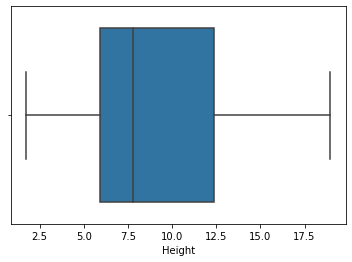

In [198]:
sns.boxplot(df['Height'])

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

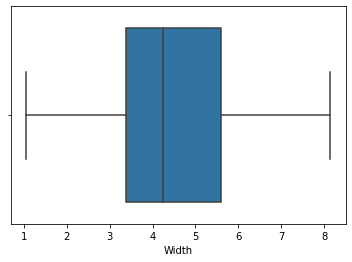

In [199]:
sns.boxplot(df['Width'])

index number 142, 143 and 144 are the outliers.

In [200]:
# Remove Outliers
data = df.drop([142,143,144])
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


### Q.3 Build a regression model and print regression equation?

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    object 
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [202]:
Data_num = data[['Weight','Length1','Length2','Length3','Height','Width']]

In [203]:
Data_dummies = pd.get_dummies(data[['Species']])

In [204]:
Data_combined = pd.concat([Data_num, Data_dummies], axis=1)

In [205]:
Data_combined.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [206]:
Data_combined.shape

(156, 13)

In [207]:
Data_combined.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [208]:
# putting features variable to x
x = Data_combined[['Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish']]

# Putting response variable to y
y = data['Weight']

In [209]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=100)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
lm= LinearRegression()

In [212]:
lm.fit(x_train, y_train)

LinearRegression()

In [213]:
print('Accuracy', lm.score(x_test,y_test)*100)
print('Accuracy', lm.score(x_train,y_train)*100)

Accuracy 95.14098833734617
Accuracy 93.8650673042858


In [214]:
print(lm.intercept_)

-550.2241994586508


In [215]:
coeff_Data= pd.DataFrame(lm.coef_,x_test.columns,columns=['coefficient'])

In [216]:
coeff_Data

,coefficient
Length1,10.758269
Length2,38.192169
Length3,-30.065771
Height,31.195307
Width,55.266295
Species_Bream,-51.104792
Species_Parkki,-45.825258
Species_Perch,-32.831229
Species_Pike,-78.279494
Species_Roach,-12.126532


### Linear Regression Formula:

In [217]:
#My Model's Linear Regression Formula:
print('y = ' + str('%.2f' % lm.intercept_) + ' + ' + str('%.2f' % lm.coef_[0]) + '*X1 ' + str('%.2f' % lm.coef_[1]) + '*X2 ' +
      str('%.2f' % lm.coef_[2]) + '*X3 + ' + str('%.2f' % lm.coef_[3]) + '*X4 + ' + str('%.2f' % lm.coef_[4]) + '*X5')

y = -550.22 + 10.76*X1 38.19*X2 -30.07*X3 + 31.20*X4 + 55.27*X5


In [218]:
# making prediction using the model
y_pred = lm.predict(x_test)
y_pred

array([187.39645737, 517.4149671 , 779.74308603, 608.64588928,
       947.88356745, 771.08455923, 415.81508804, 350.54342026,
       308.78364931, 252.09085201, 834.58642985, 236.8251531 ,
       705.97430658, 847.67417446, 830.11191243,  47.91164848,
       123.08104512, 126.7226123 , 720.71428651, 411.36958864,
       505.24644326, 892.80549624, 127.1757868 ,   7.32440773,
       159.34211563, 120.94987601,  20.35442307, 626.08441951,
       745.16306832, 143.8781493 , 878.55192407, 147.03469099])

#### Coefficient of Determination (R square)

In [219]:
from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [220]:
from math import sqrt
rmse = sqrt(mse)

In [221]:
print('Mean_Squared_Error:', mse)
print('Root_Mean_Squared_Error', rmse)
print('r_square_value:', r_squared)

Mean_Squared_Error: 6277.452973026498
Root_Mean_Squared_Error 79.23037910439719
r_square_value: 0.9514098833734617


C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


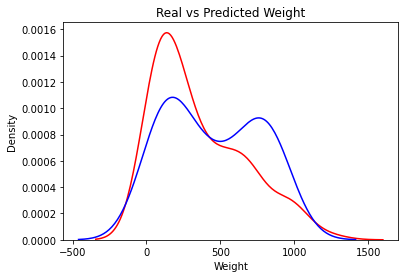

In [222]:
#distribution plot to comapre actual vs prediacted values for weight
ax1 = sns.distplot(y_train,hist= False, color = 'r', label='Real')
sns.distplot(y_pred,hist = False, color='b', label='Predicted Weight', ax=ax1)
plt.title('Real vs Predicted Weight')
plt.show()

In [223]:
import statsmodels.api as sm

In [224]:
x_train_sm = x_train
#Unlike SKlearn, statsmodel don't automatically fit a constant,
# so you need to use the model sm.add_constant(x)in order to add a constant.

x_train_sm = sm.add_constant(x_train_sm)

#create a fitted model in one line

lm_1 = sm.OLS(y_train, x_train_sm).fit()

#print the coefficient
lm_1.params

const               -481.446175
Length1               10.758269
Length2               38.192169
Length3              -30.065771
Height                31.195307
Width                 55.266295
Species_Bream       -119.882817
Species_Parkki      -114.603283
Species_Perch       -101.609254
Species_Pike        -147.057519
Species_Roach        -80.904557
Species_Smelt        172.787607
Species_Whitefish    -90.176352
dtype: float64

In [225]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     155.8
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.73e-62
Time:                        15:01:26   Log-Likelihood:                -711.77
No. Observations:                 124   AIC:                             1448.
Df Residuals:                     112   BIC:                             1481.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -481.4462     51.16

In [238]:
#Q.4 What is the mean score of the model at 95% confidence interval?
# print the coeff
lm_1.params

import statsmodels.api as sm

results=lm_1

a=results.conf_int(alpha=0.95)

a.mean()

0   -68.556552
1   -63.373614
dtype: float64

In [226]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,test_size=0.3,random_state=1)

In [227]:
from sklearn.linear_model import Ridge

In [228]:
RidgeModel=Ridge(alpha=0.95)

In [229]:
RidgeModel.fit(x_train2,y_train2)

Ridge(alpha=0.95)

In [230]:
Rcross=cross_val_score(RidgeModel2,x,y,cv=4)

In [231]:
Rcross

array([0.89236316, 0.50287364, 0.63340575, 0.61128035])

In [232]:
Rcross.mean()

0.6599807257804662

### Q.5 Compare real and predicted weights and give a conclusion statement based on it?


In [233]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,187.396457
1,517.414967
2,779.743086
3,608.645889
4,947.883567


In [234]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,160.0
1,500.0
2,820.0
3,600.0
4,1000.0


In [235]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,160.0,187.396457
1,500.0,517.414967
2,820.0,779.743086
3,600.0,608.645889
4,1000.0,947.883567
5,840.0,771.084559
6,345.0,415.815088
7,290.0,350.543420
8,218.0,308.783649
9,180.0,252.090852


### Conclusion

From the results above, one can see there is a tendency towards error estimations when the weight is small.

Accuracy test data = 95.14098833734617

Accuracy train data= 93.8650673042858